# Exploration of the Car Data


The dataset contains 3 million real world used cars details.

The data is downloaded from Kaggle: https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset/data.

The car information is in csv format. The size of the csv file is rather big, 9,98 Gt. This brings difficulties when reading the csv file into a Pandas dataframe.

The goal is to predict which features affect the most to the target values "price" and "daysonmarket".

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore', message="^Columns.*") # Gives a low_memory or dtype warning when reading the csv file

df = pd.read_csv("used_cars_data.csv") 

In [2]:
# From the datatypes we see that we need to convert some of them to appropriate formats.
# For example width, height, power and fuel tank volume are object types and not numerical such as floats/integers

print("Number of columns: ", len(df.columns))
df.info(show_counts = True)

Number of columns:  66
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000040 entries, 0 to 3000039
Data columns (total 66 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   vin                      3000040 non-null  object 
 1   back_legroom             2840771 non-null  object 
 2   bed                      19568 non-null    object 
 3   bed_height               429098 non-null   object 
 4   bed_length               429098 non-null   object 
 5   body_type                2986497 non-null  object 
 6   cabin                    63533 non-null    object 
 7   city                     3000040 non-null  object 
 8   city_fuel_economy        2508755 non-null  float64
 9   combine_fuel_economy     0 non-null        float64
 10  daysonmarket             3000040 non-null  int64  
 11  dealer_zip               3000040 non-null  object 
 12  description              2922139 non-null  object 
 13  engine_cylinders   

In [3]:
# We see that there exist a lot of null values for certain columns

print("The amount of missing values or NaN values for each column: \n ")
print(df.isnull().sum().to_string())

The amount of missing values or NaN values for each column: 
 
vin                              0
back_legroom                159269
bed                        2980472
bed_height                 2570942
bed_length                 2570942
body_type                    13543
cabin                      2936507
city                             0
city_fuel_economy           491285
combine_fuel_economy       3000040
daysonmarket                     0
dealer_zip                       0
description                  77901
engine_cylinders            100581
engine_displacement         172386
engine_type                 100581
exterior_color               49955
fleet                      1426595
frame_damaged              1426595
franchise_dealer                 0
franchise_make              572635
front_legroom               159269
fuel_tank_volume            159269
fuel_type                    82724
has_accidents              1426595
height                      159269
highway_fuel_economy       

In [4]:
# Let's see the percentages of the missing values

print("Missing values of columns in percentages: \n")
for column in df.columns:
    missing = round(df[column].isnull().sum()/len(df)*100)
    print(f"{column}: {missing} %")

Missing values of columns in percentages: 

vin: 0 %
back_legroom: 5 %
bed: 99 %
bed_height: 86 %
bed_length: 86 %
body_type: 0 %
cabin: 98 %
city: 0 %
city_fuel_economy: 16 %
combine_fuel_economy: 100 %
daysonmarket: 0 %
dealer_zip: 0 %
description: 3 %
engine_cylinders: 3 %
engine_displacement: 6 %
engine_type: 3 %
exterior_color: 2 %
fleet: 48 %
frame_damaged: 48 %
franchise_dealer: 0 %
franchise_make: 19 %
front_legroom: 5 %
fuel_tank_volume: 5 %
fuel_type: 3 %
has_accidents: 48 %
height: 5 %
highway_fuel_economy: 16 %
horsepower: 6 %
interior_color: 13 %
isCab: 48 %
is_certified: 100 %
is_cpo: 94 %
is_new: 0 %
is_oemcpo: 95 %
latitude: 0 %
length: 5 %
listed_date: 0 %
listing_color: 0 %
listing_id: 0 %
longitude: 0 %
main_picture_url: 12 %
major_options: 7 %
make_name: 0 %
maximum_seating: 5 %
mileage: 5 %
model_name: 0 %
owner_count: 51 %
power: 16 %
price: 0 %
salvage: 48 %
savings_amount: 0 %
seller_rating: 1 %
sp_id: 0 %
sp_name: 0 %
theft_title: 48 %
torque: 17 %
transmission

In [5]:
# Let's print the number of unique values for object-type columns which should contain at least all categorical features.

print("The amount of unique values of object valued columns: ")
df.select_dtypes(include='object').nunique()

The amount of unique values of object valued columns: 


vin                     3000000
back_legroom                219
bed                           3
bed_height                    1
bed_length                   83
body_type                     9
cabin                         4
city                       4687
dealer_zip                 9215
description             2519325
engine_cylinders             39
engine_type                  39
exterior_color            28664
fleet                         2
frame_damaged                 2
franchise_make               48
front_legroom               101
fuel_tank_volume            182
fuel_type                     8
has_accidents                 2
height                      472
interior_color            45725
isCab                         2
is_cpo                        1
is_oemcpo                     1
length                      836
listed_date                1749
listing_color                15
main_picture_url        2415855
major_options            279972
make_name                   100
maximum_

In [6]:
# As an example of all values we have the column values of the fifth car. Again we see that datatype conversion is needed.

print("Column values of the fifth car: \n")
for column in df.columns:
    value = df.loc[4, column]
    print(f"{column}: {value}")

Column values of the fifth car: 

vin: SALCJ2FXXLH862327
back_legroom: 38.1 in
bed: nan
bed_height: nan
bed_length: nan
body_type: SUV / Crossover
cabin: nan
city: San Juan
city_fuel_economy: nan
combine_fuel_economy: nan
daysonmarket: 137
dealer_zip: 922
description: [!@@Additional Info@@!]Keyless Entry,Ebony Morzine Headliner,Chrome Wheel Protection Pack,ClearSight Rearview Mirror,Loadspace Mat,Wheels: 18' Style 5075 Gloss Sparkle Silver,Head-Up Display,Cargo Carrier,High Speed Emergency Braking,Adaptive Cruise Control w/Stop & Go,Sunshade,Technology Pack,12-Way Electric Front Seats,Rubber Mats,Drive Pack,Basic Rear Seat Convenience Pack,Fixed Panoramic Roof,Premium Interior Protection,Interactive Driver Display,Blind Spot Assist,Cargo Net,Wireless Device Charging
engine_cylinders: I4
engine_displacement: 2000.0
engine_type: I4
exterior_color: Narvik Black
fleet: nan
frame_damaged: nan
franchise_dealer: True
franchise_make: Land Rover
front_legroom: 39.1 in
fuel_tank_volume: 17.7 gal

Below are the explanations for the column names. Some of them (41 first columns) were already described in Kaggle. The rest of the columns we have figured out by ourselves. We see that there is reduntant information in some columns (repeated information). From this list we conclude which features are the most essentials in our data analysis.


1. **vin**: Type String. Vehicle Identification Number is a unique encoded string for every vehicle. Read more at https://www.autocheck.com/vehiclehistory/vin-basics.
2. **back_legroom**: Type String. Legroom in the rear seat.
3. **bed**: Type String. Category of bed size (open cargo area) in pickup truck. Null usually means the vehicle isn't a pickup truck. (**99 % missing values!**)
4. **bed_height**: Type String. Height of bed in inches. (**86 % missing values!**)
5. **bed_length**: Type String. Length of bed in inches. (**86 % missing values!**)
6. **body_type**: Type String. Body Type of the vehicle. Like Convertible, Hatchback, Sedan, etc.
7. **cabin**: Type String. Category of cabin size(open cargo area) in pickup truck. Eg: Crew Cab, Extended Cab, etc. (**98 % missing values!**)
8. **city**: Type String. City where the car is listed. Eg: Houston, San Antonio, etc.
9. **city_fuel_economy**: Type Float. Fuel economy in city traffic in km per litre. 
10. **combine_fuel_economy**: Type Float. Combined fuel economy is a weighted average of City and Highway fuel economy in km per litre. (**100 % missing values!** **<-** **construct this variable!**)
11. **daysonmarket**: Type Integer. Days since the vehicle was first listed on the website. (**TARGET VALUE**)
12. **dealer_zip**: Type Integer. Zipcode of the dealer.
13. **description**: Type String. Vehicle description on the vehicle's listing page.
14. **engine_cylinders**: Type String. The engine configuration. Eg: I4, V6, etc.
15. **engine_displacement**: Type Float. engine_displacement is the measure of the cylinder volume swept by all of the pistons of a piston engine, excluding the combustion chambers.
16. **engine_type**: Type String. The engine configuration. Eg: I4, V6, etc.
17. **exterior_color**: Type String. Exterior color of the vehicle, usually a fancy one same as the brochure.
18. **fleet**: Type Boolean. Whether the vehicle was previously part of a fleet, i.e. vehicle owned or leased by a business, government agency, or other organization rather than by an individual or family. (**48 % missing values!**)
19. **frame_damaged**: Type Boolean. Whether the vehicle has a damaged frame. (**48 % missing values!**).
20. **franchise_dealer**: Type Boolean. Whether the dealer is a franchise dealer.
21. **franchise_make**: Type String. The company that owns the franchise.
22. **front_legroom**: Type String. The legroom in inches for the passenger seat.
23. **fuel_tank_volume**: Type String. Fuel tank's filling capacity in gallons.
24. **fuel_type**: Type String. Dominant type of fuel ingested by the vehicle.
25. **has_accidents**: Type Boolean. Whether the vin has any accidents registered (**48 % missing values!**).
26. **height**: Type String. Height of the vehicle in inches.
27. **highway_fuel_economy**: Type Float. Fuel economy in highway traffic in km per litre.
28. **horsepower**: Type Float. Horsepower is the power produced by an engine.
29. **interior_color**: Type String. Interior color of the vehicle, usually a fancy one same as the brochure.
30. **isCab**: Type Boolean. Whether the vehicle was previously taxi/cab. (**48 % missing values!**).
31. **is_certified**: Type Boolean. Whether the vehicle is certified. Certified cars are covered through warranty period. (**100 % missing values!**)
32. **is_cpo**: Type Boolean. Pre-owned cars certified by the dealer. Certified vehicles come with a manufacturer warranty for free repairs for a certain time period. Read more at https://www.cartrade.com/blog/2015/auto-guides/pros-and-cons-of-buying-a-certified-pre-owned-car-1235.html. (**94 % missing values!**)
33. **is_new**: Type Boolean. If True means the vehicle was launched less than 2 years ago.
34. **is_oemcpo**: Type Boolean. Pre-owned cars certified by the manufacturer. Read more at https://www.cargurus.com/Cars/articles/know_the_difference_dealership_cpo_vs_manufacturer_cpo. (**95 % missing values!**)
35. **latitude**: Type Float. Latitude from the geolocation of the dealership.
36. **length**: Type String. Length of the vehicle in inches.
37. **listed_date**: Type String. The date the vehicle was listed on the website. Does not make days_on_market obsolete. The prices is days_on_market days after the listed date.
38. **listing_color**: Type String. Dominant color group from the exterior color.
39. **listing_id**: Type Integer. Unique listing id from the website.
40. **longitude**: Type Float. Longitude from the geolocation of the dealership.
41. **main_picture_url**: Type String. Main picture of the vehicle.
42. **major_options**: Type String. List of the accessories of the vehicle.
43. **make_name**: Type String. The name of the manufacturer of the vehicle.
44. **maximum_seating**: Type String. The maximum amount of people that can fit in the vehicle.
45. **mileage**: Type Float. How many miles the vehicle has been driven.
46. **model_name**: Type String. Name of the model of the car.
47. **owner_count**: Type Float. How many owners the car has had. (**51 % missing values!**)
48. **power**: Type String. Power produced by the engine and the revolutions per minute (rpm).
49. **price**: Type Float. The price of the car. (**TARGET VALUE**)
50. **salvage**: Type Bool. Salvage title of the car (has the car been badly damaged before, an automobile is due to receive a salvage title if it loses more than 75% of its original value). (**48 % missing values!**)
51. **savings_amount**: Type Int. The amount of savings while purchasing the car 
52. **seller_rating**: Type Float. Rating of the dealership that is selling the car (rating from 1 to 5 stars).
53. **sp_id**: Type Float. Service principal ID (acts as a unique identifier for the vehicle).
54. **sp_name**: Type String. Name of the dealership selling the vehicle.
55. **theft_title**: Type Bool. Whether the car has been stolen previously. (**48 % missing values!** **<-** **compare to the same percentages as above, could be the same rows?**)
56. **torque**: Type String. Engine's rotational force (measures how much twisting force is available).
57. **transmission**: Type String. Type of transmission of the vehicle (automatic, manual etc.).
58. **transmission_display**: Type String. more detailed version of the transmission column
59. **trimId**: Type String. Trim Id of the vehicle (unique identifier of the vehicle).
60. **trim_name**: Type String. Name of the trim of the car (unique identifier of the vehicle).
61. **vehicle_damage_category**: Type Float. The damage category of the vehicle. (**100 % missing values!**)
62. **wheel_system**: Type String. How the power of the engine is transmitted to the wheels (which wheels are pulling).
63. **wheel_system_display**: Type String. More detailed version of the wheel_system column.
64. **wheelbase**: Type String. The distance between the front and rear axles of the car.
65. **width**: Type String. Width of the vehicle (in inches).
66. **year**: Type Int. The year when the car was manufactured.
 

**Important features**: 

1.  **back_legroom**: Legroom in the rear seat.
2.  **body_type**: Body Type of the vehicle (convertible, Hatchback, Sedan, etc.).
4. **city_fuel_economy**: Fuel economy in city traffic in km per litre.
5.  **combine_fuel_economy**: Combined fuel economy. 100 % missing values but **this variable can be constructed**. If we use this then we can drop features **city_fuel_economy** and **highway_fuel_economy**.
6.  **daysonmarket**: Days since the vehicle was first listed on the website. Target value.
8. **engine_cylinders**: The engine configuration. Eg: I4, V6, etc.
9. **engine_displacement**: The measure of the cylinder volume swept by all of the pistons of a piston engine, excluding the combustion chambers.
10. **engine_type**: The engine configuration. Eg: I4, V6, etc.
12. **front_legroom**: The legroom in inches for the passenger seat.
13. **fuel_tank_volume**: Fuel tank's filling capacity in gallons.
14. **fuel_type**: Dominant type of fuel ingested by the vehicle.
15. **height**: Height of the vehicle in inches.
16. **highway_fuel_economy**: Fuel economy in highway traffic in km per litre.
17. **horsepower**: Horsepower is the power produced by an engine.
18. **interior_color**: Interior color of the vehicle, usually a fancy one same as the brochure.
19. **length**: Length of the vehicle in inches.
20. **listing_color**: Dominant color group from the exterior color.
21. **major_options**: List of the accessories of the vehicle.
22. **make_name**: The name of the manufacturer of the vehicle.
23. **maximum_seating**: The maximum amount of people that can fit in the vehicle.
24. **mileage**: How many miles the vehicle has been driven.
25. **model_name**: Name of the model of the car.
26. **price**: The price of the car. Target value.
27. **savings_amount**: The amount of savings while purchasing the car.
28. **seller_rating**: Rating of the dealership that is selling the car (rating from 1 to 5 stars).
29. **torque**: Engine's rotational force (measures how much twisting force is available).
30. **transmission**: Type of transmission of the vehicle (automatic, manual etc.).
31. **wheel_system**: How the power of the engine is transmitted to the wheels (which wheels are pulling).
32. **wheelbase**: The distance between the front and rear axles of the car.
33. **width**: Width of the vehicle (in inches).
34.  **year**: The year when the car was manufactured.




**Irrelevant and reduntant features or features with a lot of missing values**:

1. **vin**: Identification number.
2. **bed**: Category of bed size (open cargo area) in pickup truck. **99 % missing values**.
3. **bed_height**: Height of bed in inches. **86 % missing values**.
4. **bed_length**: Length of bed in inches. **86 % missing values**.
5. **cabin**: Category of cabin size(open cargo area) in pickup truck. **98 % missing values**.
6. **city**: City where the car is listed.
7. **dealer_zip**: Zipcode of the dealer. **Reduntant with the feature** **city**.
8. **description**: Vehicle description on the vehicle's listing page. Other columns together should include the same information.
9. **exterior_color**: Exterior color of the vehicle, usually a fancy one same as the brochure. **Reduntant with the feature listing_color**.
10. **fleet**: Whether the vehicle was previously part of a fleet. **48 % missing values**. This value is important but can not be filled reliably.
11. **frame_damaged**: Whether the vehicle has a damaged frame. **48 % missing values**. This value is important but can not be filled reliably.
12. **franchise_dealer**: Whether the dealer is a franchise dealer.
13. **franchise_make**: The company that owns the franchise.
14. **has_accidents**: Whether the vin has any accidents registered **48 % missing values**. This value is important but can not be filled reliably.
15. **isCab**: Whether the vehicle was previously taxi/cab. **48 % missing values**. This value is important but can not be filled reliably.
16. **is_certified**: Whether the vehicle is certified. **100 % missing values**.
17. **is_cpo**: Pre-owned cars certified by the dealer. **94 % missing values**.
18. **is_new**: If True means the vehicle was launched less than 2 years ago. **Reduntant with the feature year**.
19. **is_oemcpo**: Pre-owned cars certified by the manufacturer. **95 % missing values**.
20. **latitude**: Latitude from the geolocation of the dealership.
21. **listed_date**: The date the vehicle was listed on the website. **Reduntant with the feature year and daysonmarket**.
22. **listing_id**: Unique listing id from the website.
23. **longitude**: Longitude from the geolocation of the dealership.
24. **main_picture_url**: Main picture of the vehicle. Important feature but difficult to take into account in analysis.
25. **owner_count**: How many owners the car has had. **51 % missing values**. This value is important but can not be filled reliably.
26. **power**: Power produced by the engine and the revolutions per minute (rpm). **Reduntant with the feature horsepower**.
27. **salvage**: Salvage title of the car. **48 % missing values**. This value is important but can not be filled reliably.
28. **sp_id**: Service principal ID (acts as a unique identifier for the vehicle).
29. **sp_name**: Name of the dealership selling the vehicle.
30. **theft_title**: Whether the car has been stolen previously. **48 % missing values**. This value is important but can not be filled reliably.
31. **transmission_display**: More detailed version of the transmission column. **Reduntant with the feature transmission**.
32. **trimId**: Trim Id of the vehicle (unique identifier of the vehicle).
33. **trim_name**: Name of the trim of the car (unique identifier of the vehicle).
34. **vehicle_damage_category**: The damage category of the vehicle. **100 % missing values**.
35. **wheel_system_display**: More detailed version of the wheel_system column. **Reduntant with the feature wheel_system**.

**Other features which could be constructed**:
-  Legroom with the formula: legroom = front legroom + back legroom (then drop front legroom and back legroom)
- Total volume with the formula: total_volume = length * width * height + fuel_tank_volume + maximum seating (then drop the previous features)


In [7]:
# Let's see the information of the first 12 cars..
df.head(12)

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,...,A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,...,M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
5,SALYK2EX1LA261711,37.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,8-Speed Automatic Overdrive,t85614,P250 R-Dynamic S AWD,NaN,AWD,All-Wheel Drive,113.1 in,84.4 in,2020
6,3MZBPABL6KM107908,35.1 in,NaN,NaN,NaN,Sedan,NaN,Bayamon,NaN,NaN,...,A,6-Speed Automatic Overdrive,t85256,Sedan FWD,NaN,FWD,Front-Wheel Drive,107.3 in,70.7 in,2019
7,SALYK2EX5LA275434,37.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,8-Speed Automatic Overdrive,t85614,P250 R-Dynamic S AWD,NaN,AWD,All-Wheel Drive,113.1 in,84.4 in,2020
8,SALCJ2FX6LH858128,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
9,SALZL2GX4LH007593,33.8 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t85531,P300 R-Dynamic SE AWD,NaN,AWD,All-Wheel Drive,105.6 in,82.7 in,2020


In [8]:
# ..and last 12 cars

df.tail(12)

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
3000028,JF2SJABC1HH545173,38 in,NaN,NaN,NaN,SUV / Crossover,NaN,Napa,26.0,NaN,...,CVT,Continuously Variable Transmission,t68596,2.5i,NaN,AWD,All-Wheel Drive,103.9 in,80 in,2017
3000029,2C3CDZBT8LH222948,33.1 in,NaN,NaN,NaN,Coupe,NaN,Napa,16.0,NaN,...,A,8-Speed Automatic,t90116,R/T RWD,NaN,RWD,Rear-Wheel Drive,116 in,85.4 in,2020
3000030,3FA6P0D96KR207676,38.3 in,NaN,NaN,NaN,Sedan,NaN,Fairfield,20.0,NaN,...,A,Automatic,t81778,Titanium AWD,NaN,AWD,All-Wheel Drive,112.2 in,83.5 in,2019
3000031,1N4AL3AP0JC274037,36.1 in,NaN,NaN,NaN,Sedan,NaN,Napa,26.0,NaN,...,CVT,Continuously Variable Transmission,t76331,2.5 SR,NaN,FWD,Front-Wheel Drive,109.3 in,72 in,2018
3000032,3N6CM0KNXLK704386,--,NaN,NaN,NaN,Van,NaN,Napa,24.0,NaN,...,CVT,Continuously Variable Transmission,t88980,S FWD,NaN,FWD,Front-Wheel Drive,115.2 in,68.1 in,2020
3000033,JTDKB20U363142125,38.6 in,NaN,NaN,NaN,Hatchback,NaN,Fremont,48.0,NaN,...,CVT,Continuously Variable Transmission,t12219,FWD,NaN,FWD,Front-Wheel Drive,106.3 in,67.9 in,2006
3000034,3TMCZ5AN6HM083436,32.6 in,NaN,--,60.5 in,Pickup Truck,NaN,Ukiah,18.0,NaN,...,A,6-Speed Automatic,t68366,TRD Sport V6 Double Cab 4WD,NaN,4WD,Four-Wheel Drive,127.4 in,75.2 in,2017
3000035,2GNAXJEV0J6261526,39.7 in,NaN,NaN,NaN,SUV / Crossover,NaN,Fairfield,26.0,NaN,...,A,Automatic,t72936,1.5T LT FWD,NaN,FWD,Front-Wheel Drive,107.3 in,72.6 in,2018
3000036,1GNERFKW0LJ225508,38.4 in,NaN,NaN,NaN,SUV / Crossover,NaN,Vallejo,18.0,NaN,...,A,Automatic,t85763,LS FWD,NaN,FWD,Front-Wheel Drive,120.9 in,78.6 in,2020
3000037,3FA6P0HD3GR134062,38.3 in,NaN,NaN,NaN,Sedan,NaN,Napa,NaN,NaN,...,A,6-Speed Automatic Overdrive,t57569,SE,NaN,FWD,Front-Wheel Drive,112.2 in,83.5 in,2016


In [9]:
# Some statistics of the columns. Further information can not be obtained before cleaning the data

df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,is_certified,latitude,listing_id,longitude,mileage,owner_count,price,savings_amount,seller_rating,sp_id,vehicle_damage_category,year
count,2508755.0,0.0,3000040.0,2827654.0,2508755.0,2827654.0,0.0,3000040.0,3000040.0,3000040.0,2855653.0,1483027.0,3000040.0,3000040.0,2959168.0,2999944.0,0.0,3000040.0
mean,22.7,nan,76.1,2968.5,29.5,248.0,nan,37.0,275498673.8,-90.6,31146.9,1.5,29933.4,551.0,4.3,233522.4,nan,2017.7
std,8.8,nan,108.9,1348.9,7.8,90.5,nan,5.0,8894122.7,13.9,74586.7,0.9,19566.2,1079.4,0.5,132322.1,nan,4.2
min,7.0,nan,0.0,700.0,10.0,55.0,nan,18.3,19946203.0,-157.9,0.0,1.0,165.0,0.0,1.0,41593.0,nan,1915.0
25%,18.0,nan,14.0,2000.0,25.0,175.0,nan,33.5,274579410.5,-97.1,6.0,1.0,18451.0,0.0,4.0,63375.0,nan,2017.0
50%,21.0,nan,35.0,2500.0,29.0,244.0,nan,37.8,278545307.0,-87.2,8267.0,1.0,26477.0,0.0,4.3,281627.0,nan,2020.0
75%,26.0,nan,82.0,3600.0,33.0,300.0,nan,41.0,280455336.2,-80.5,43662.0,2.0,38220.0,785.0,4.6,336614.0,nan,2020.0
max,127.0,nan,3599.0,8400.0,127.0,1001.0,nan,61.2,282022171.0,-66.1,99999988.0,19.0,3299995.0,147414.0,5.0,440951.0,nan,2021.0


In [10]:
# Let's see how many duplicate rows there exist in the data

duplicates = df.duplicated().sum()
print(f"Amount of duplicate rows: {duplicates}")
percentage = round(duplicates/len(df)*100, 4)
print(f"Percentage of duplicate rows: {percentage} %")

Amount of duplicate rows: 40
Percentage of duplicate rows: 0.0013 %


Largest value:  3599
Lowest value:  0
Median value:  35


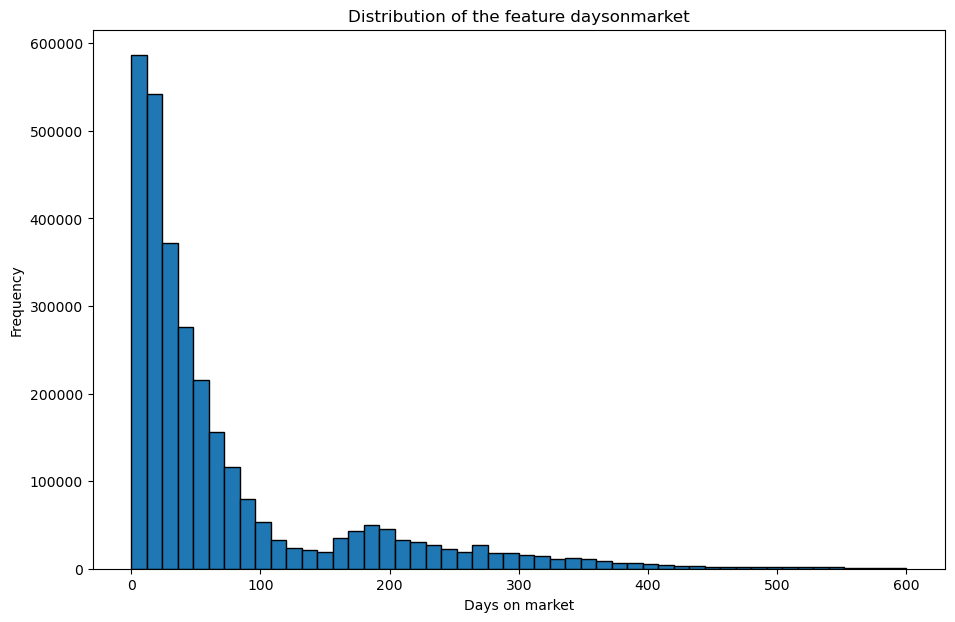

In [11]:
# Let's show histograms of a few important features

# Histogram for the target value "daysonmarket" 

import matplotlib.pyplot as plt

ax1 = df["daysonmarket"].plot(kind = "hist", bins = 50, range=[0, 600], figsize = (11, 7), edgecolor = "black")
plt.xlabel("Days on market")
ax1.ticklabel_format(style='plain')
plt.title("Distribution of the feature daysonmarket")
print("Largest value: ", df["daysonmarket"].max())
print("Lowest value: ", df["daysonmarket"].min())
print("Median value: ", round(df["daysonmarket"].median()))


Largest value:  3299995
Lowest value:  165
Average value:  29933
Standard deviation:  19566


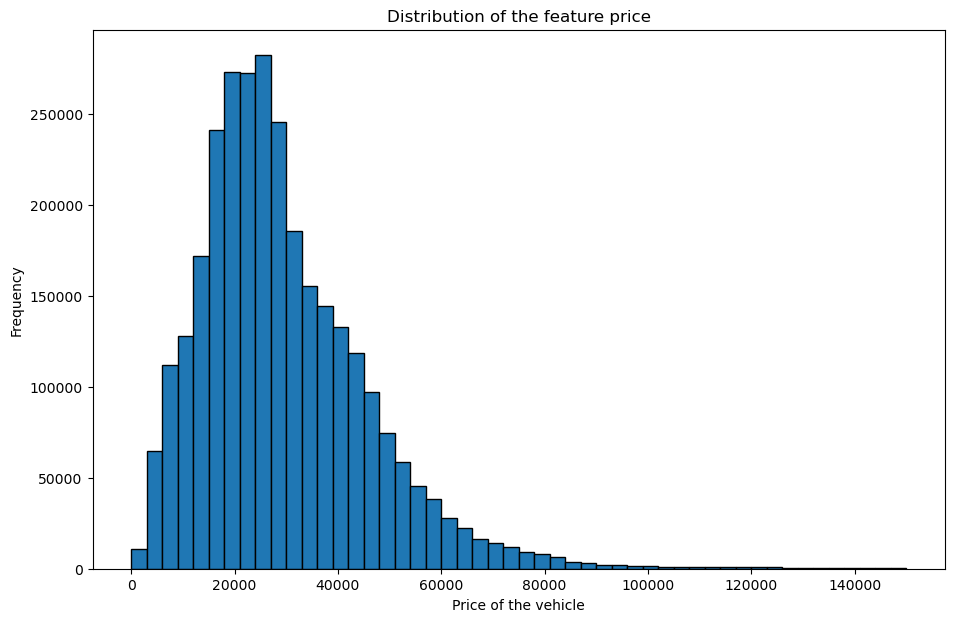

In [12]:
# Histogram for the target value "price" 

ax2 = df["price"].plot(kind = "hist", bins = 50, figsize = (11, 7),  range=[0, 150000], edgecolor = "black")
plt.xlabel("Price of the vehicle")
ax2.ticklabel_format(style='plain')
plt.title("Distribution of the feature price")
print("Largest value: ", round(df["price"].max()))
print("Lowest value: ", round(df["price"].min()))
print("Average value: ", round(df["price"].mean()))
print("Standard deviation: ", round(df["price"].std()))


Largest value:  2021
Lowest value:  1915
Median value:  2020


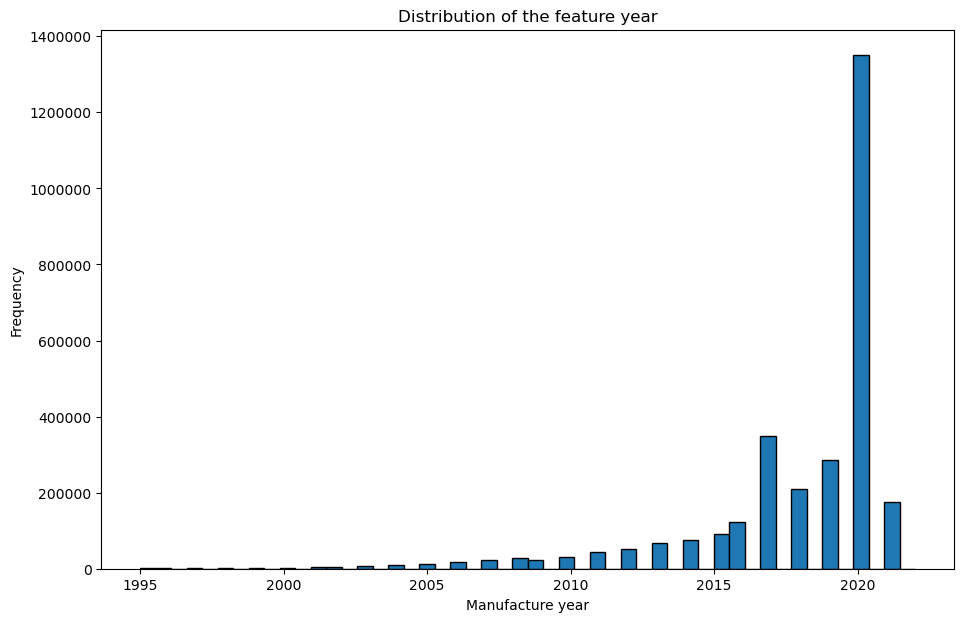

In [13]:
# Histogram for the feature "year" (manufacture year) 

ax3 = df["year"].plot(kind = "hist", bins = 50, figsize = (11, 7), edgecolor = "black", range=[1995, 2022])
plt.xlabel("Manufacture year")
ax3.ticklabel_format(style='plain')
plt.title("Distribution of the feature year")
print("Largest value: ", df["year"].max())
print("Lowest value: ", df["year"].min())
print("Median value: ", round(df["year"].median()))

Largest value:  99999988
Lowest value:  0
Median value:  8267


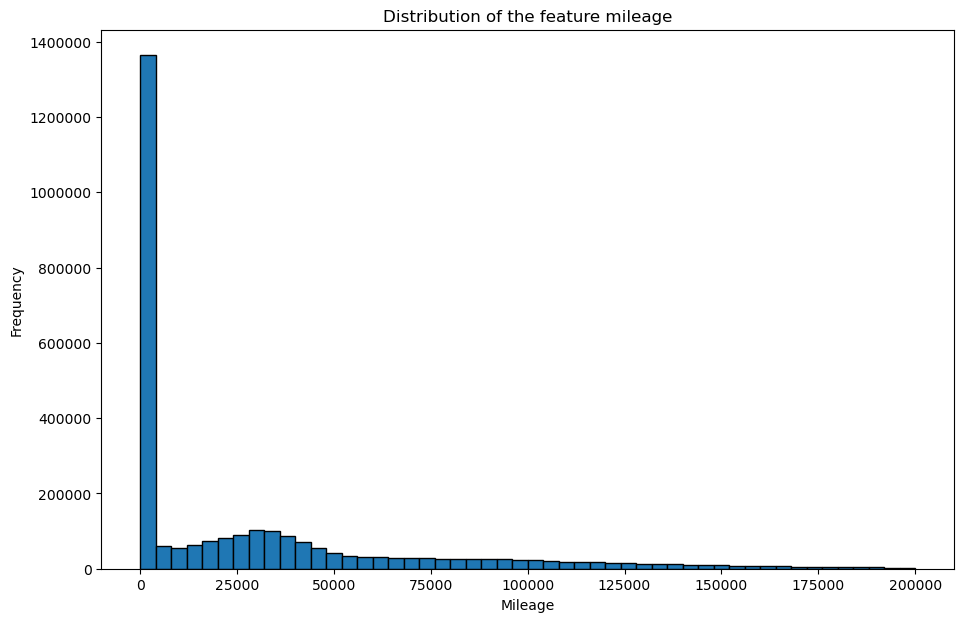

In [14]:
# Histogram for the feature "mileage" (driven miles) 

ax4 = df["mileage"].plot(kind = "hist", bins = 50, figsize = (11, 7), edgecolor = "black", range=[0, 200000])
plt.xlabel("Mileage")
ax4.ticklabel_format(style='plain')
plt.title("Distribution of the feature mileage")
print("Largest value: ", round(df["mileage"].max()))
print("Lowest value: ", round(df["mileage"].min()))
print("Median value: ", round(df["mileage"].median()))

Largest value:  1001
Lowest value:  55
Average value:  248
Standard deviation:  90


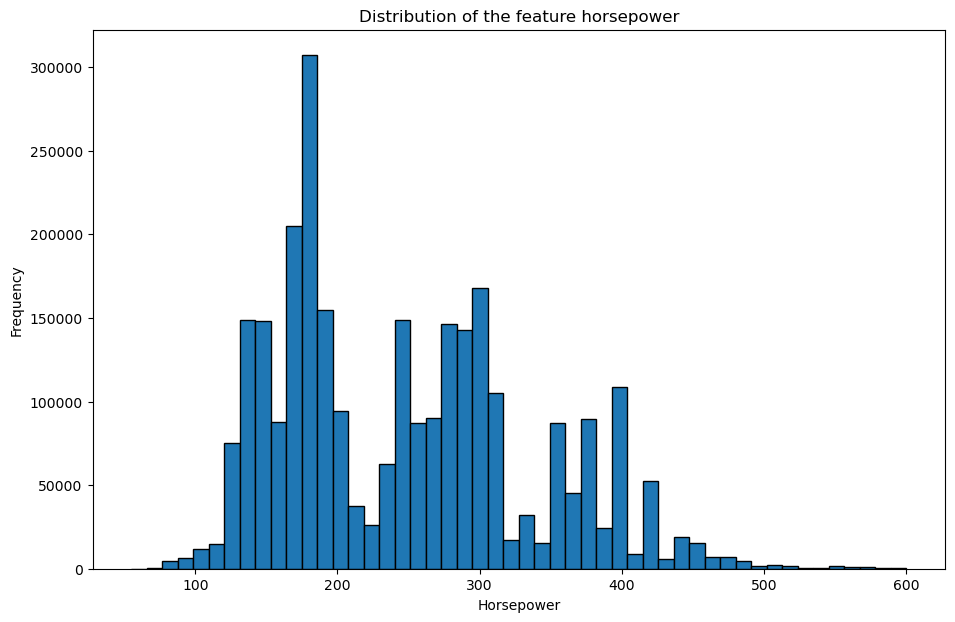

In [15]:
# Histogram for the feature "horsepower" 

ax5 = df["horsepower"].plot(kind = "hist", bins = 50, figsize = (11, 7), edgecolor = "black", range=[55, 600])
plt.xlabel("Horsepower")
ax5.ticklabel_format(style='plain')
plt.title("Distribution of the feature horsepower")
print("Largest value: ", round(df["horsepower"].max()))
print("Lowest value: ", round(df["horsepower"].min()))
print("Average value: ", round(df["horsepower"].mean()))
print("Standard deviation: ", round(df["horsepower"].std()))

Largest value:  127
Lowest value:  7
Average value:  23
Standard deviation:  9


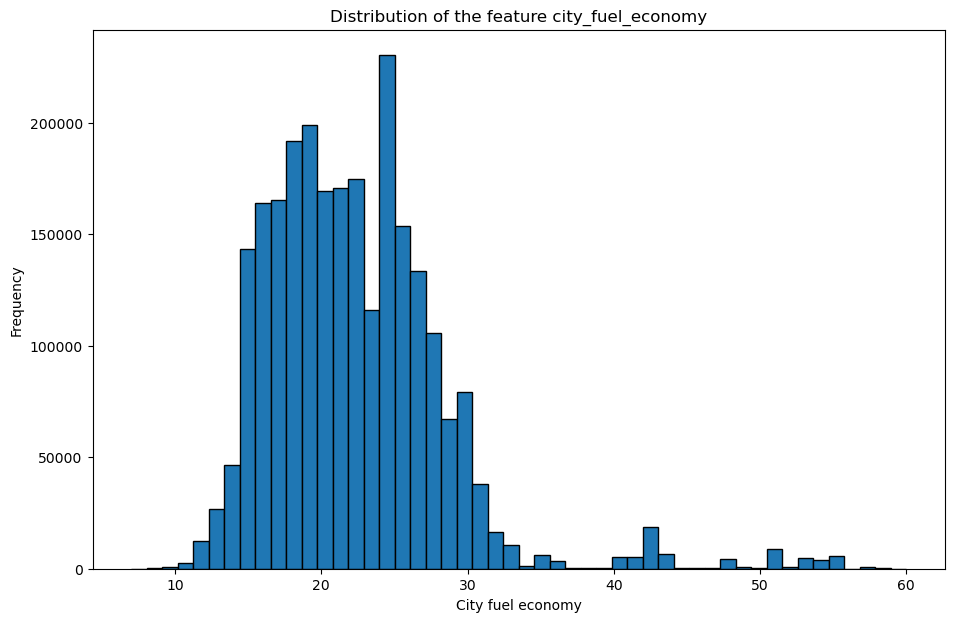

In [16]:
# Histogram for the feature "city_fuel_economy" (fuel economy in city traffic in km per litre) 

ax6 = df["city_fuel_economy"].plot(kind = "hist", bins = 50, figsize = (11, 7), edgecolor = "black", range=[7, 60])
plt.xlabel("City fuel economy")
ax6.ticklabel_format(style='plain')
plt.title("Distribution of the feature city_fuel_economy")
print("Largest value: ", round(df["city_fuel_economy"].max()))
print("Lowest value: ", round(df["city_fuel_economy"].min()))
print("Average value: ", round(df["city_fuel_economy"].mean()))
print("Standard deviation: ", round(df["city_fuel_economy"].std()))

Largest value:  127
Lowest value:  10
Average value:  29
Standard deviation:  8


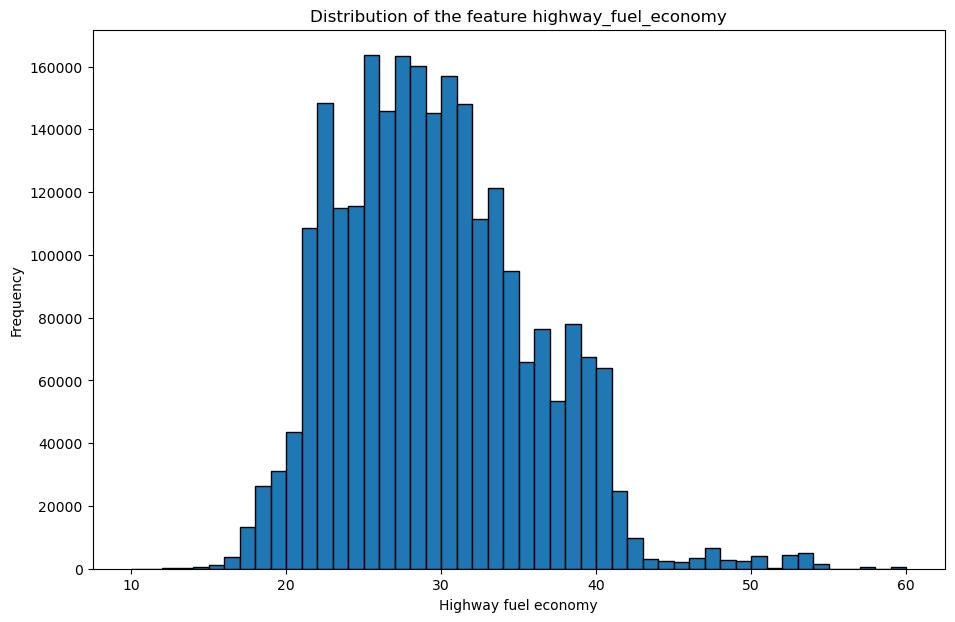

In [17]:
# Histogram for the feature "highway_fuel_economy" (fuel economy in highway traffic in km per litre. 

ax7 = df["highway_fuel_economy"].plot(kind = "hist", bins = 50, figsize = (11, 7), edgecolor = "black", range=[10, 60])
plt.xlabel("Highway fuel economy")
ax7.ticklabel_format(style='plain')
plt.title("Distribution of the feature highway_fuel_economy")
print("Largest value: ", round(df["highway_fuel_economy"].max()))
print("Lowest value: ", round(df["highway_fuel_economy"].min()))
print("Average value: ", round(df["highway_fuel_economy"].mean()))
print("Standard deviation: ", round(df["highway_fuel_economy"].std()))

Largest value:  5
Lowest value:  1
Average value:  4


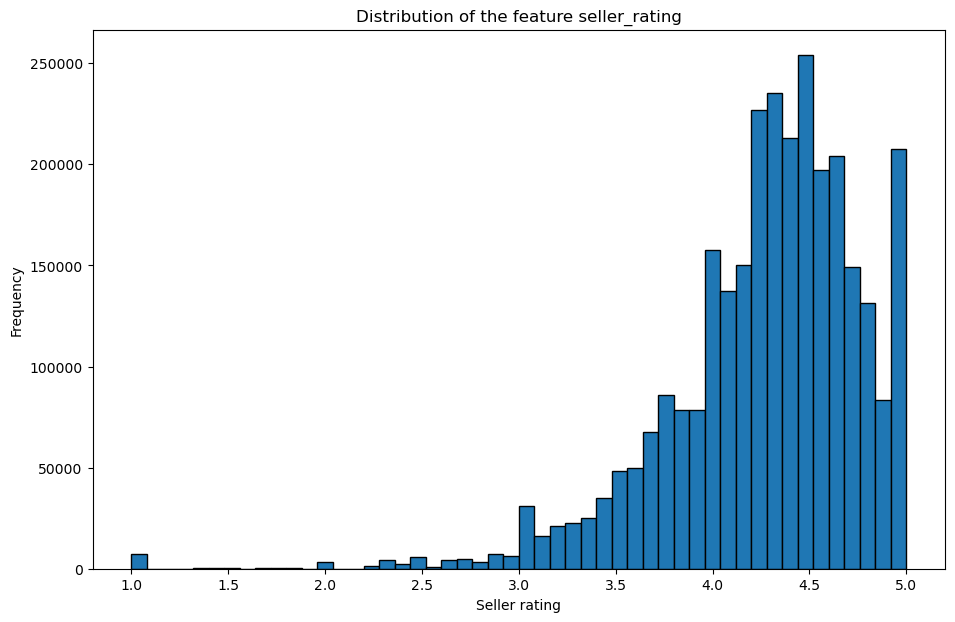

In [18]:
# Histogram for the feature "seller_rating" (from 1 to 5 stars). 

ax8 = df["seller_rating"].plot(kind = "hist", bins = 50, figsize = (11, 7), edgecolor = "black", range=[1, 5])
plt.xlabel("Seller rating")
ax8.ticklabel_format(style='plain')
plt.title("Distribution of the feature seller_rating")
print("Largest value: ", round(df["seller_rating"].max()))
print("Lowest value: ", round(df["seller_rating"].min()))
print("Average value: ", round(df["seller_rating"].mean()))


Largest value:  147414
Lowest value:  0
Average value:  551
Median value:  0


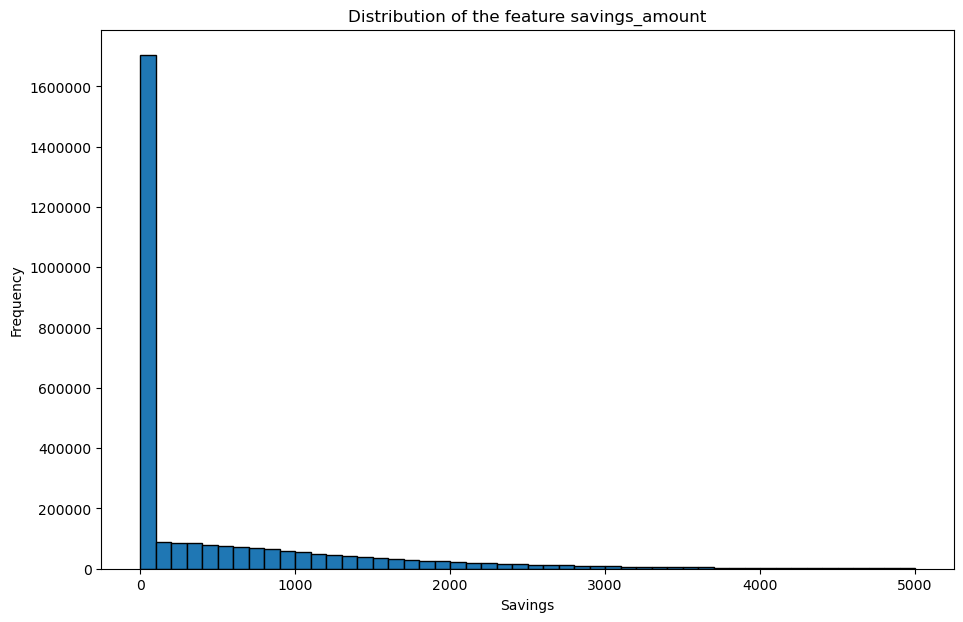

In [19]:
# Histogram for the feature "savings_amount". 

ax9 = df["savings_amount"].plot(kind = "hist", bins = 50, figsize = (11, 7), edgecolor = "black", range=[0, 5000])
plt.xlabel("Savings")
ax9.ticklabel_format(style='plain')
plt.title("Distribution of the feature savings_amount")
print("Largest value: ", round(df["savings_amount"].max()))
print("Lowest value: ", round(df["savings_amount"].min()))
print("Average value: ", round(df["savings_amount"].mean()))
print("Median value: ", round(df["savings_amount"].median()))

Most common body type: SUV / Crossover with 1416402 counts


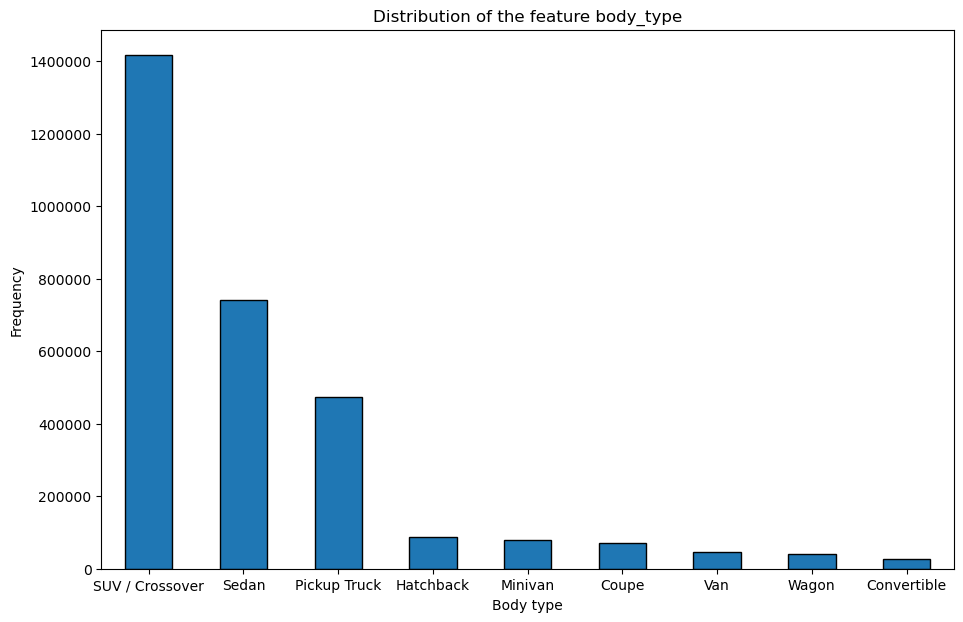

In [20]:
# Barplot for the feature "body_type".

ax10 = df["body_type"].value_counts().plot(kind='bar', figsize = (11, 7), edgecolor = "black")
ax10.tick_params(axis='x', rotation=0)
ax10.ticklabel_format(style='plain', axis="y")
plt.xlabel("Body type")
plt.ylabel("Frequency")
plt.title("Distribution of the feature body_type")
mode1 = df["body_type"].mode().values[0]
counts1 = len(df[df["body_type"] == df["body_type"].mode().values[0]])
print(f"Most common body type: {mode1} with {counts1} counts")


Most common fuel type: Gasoline with 2598436 counts


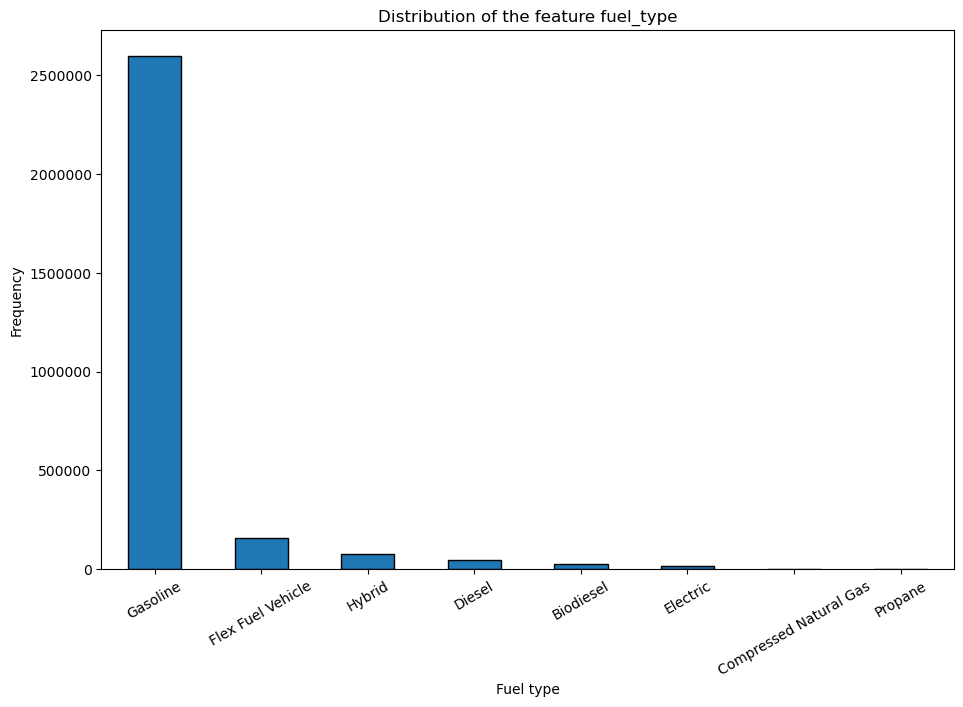

In [21]:
# Barplot for the feature "fuel_type".

ax11 = df["fuel_type"].value_counts().plot(kind='bar', figsize = (11, 7), edgecolor = "black")
ax11.tick_params(axis='x', rotation=30)
ax11.ticklabel_format(style='plain', axis="y")
plt.xlabel("Fuel type")
plt.ylabel("Frequency")
plt.title("Distribution of the feature fuel_type")

mode2 = df["fuel_type"].mode().values[0]
counts2 = len(df[df["fuel_type"] == df["fuel_type"].mode().values[0]])
print(f"Most common fuel type: {mode2} with {counts2} counts")


<Axes: title={'center': 'city fuel economy vs. highway fuel economy'}, xlabel='city_fuel_economy', ylabel='highway_fuel_economy'>

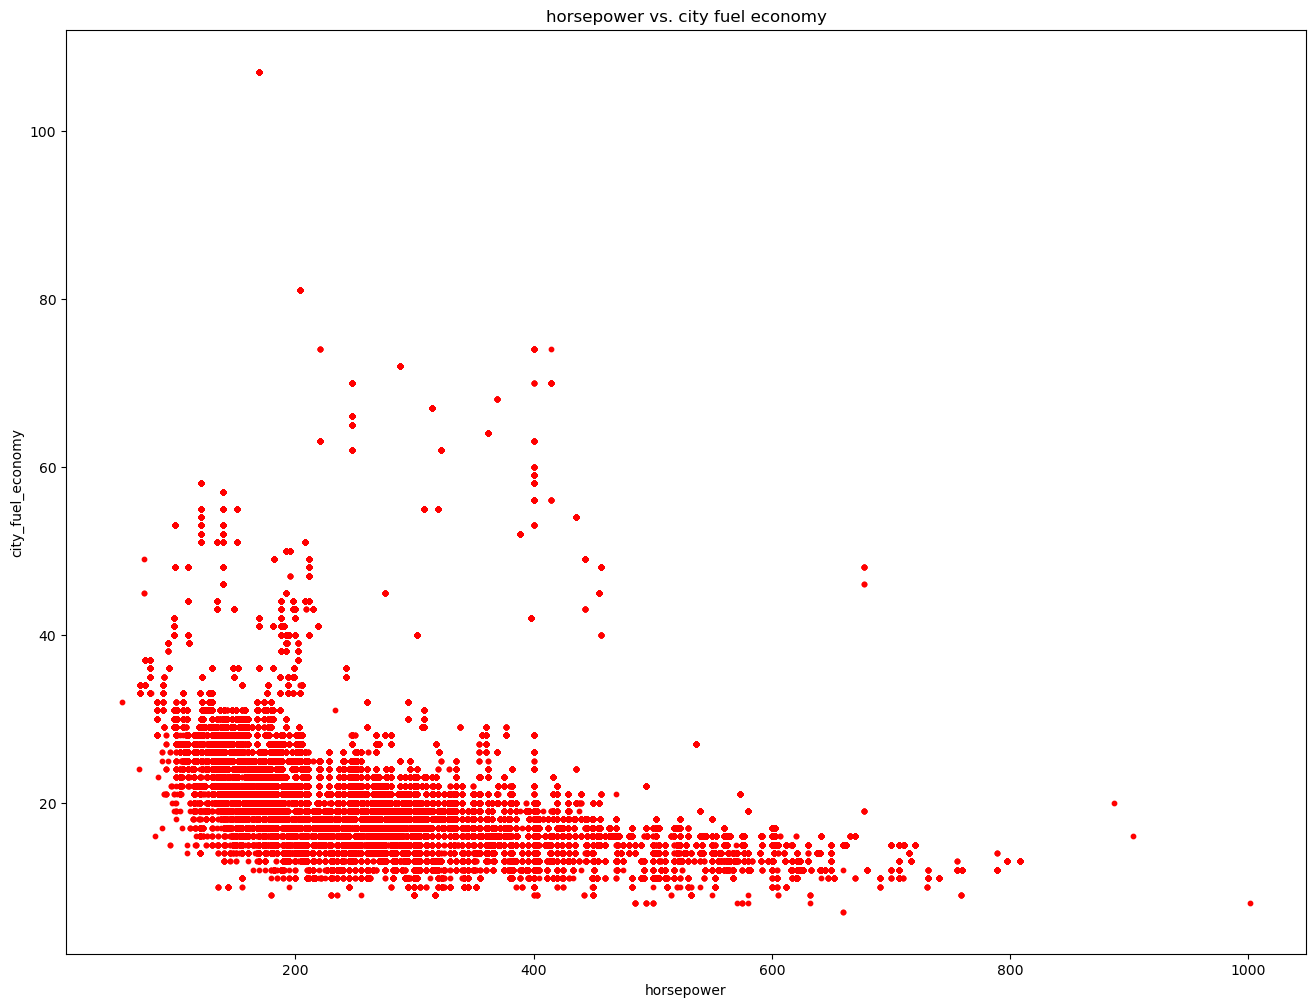

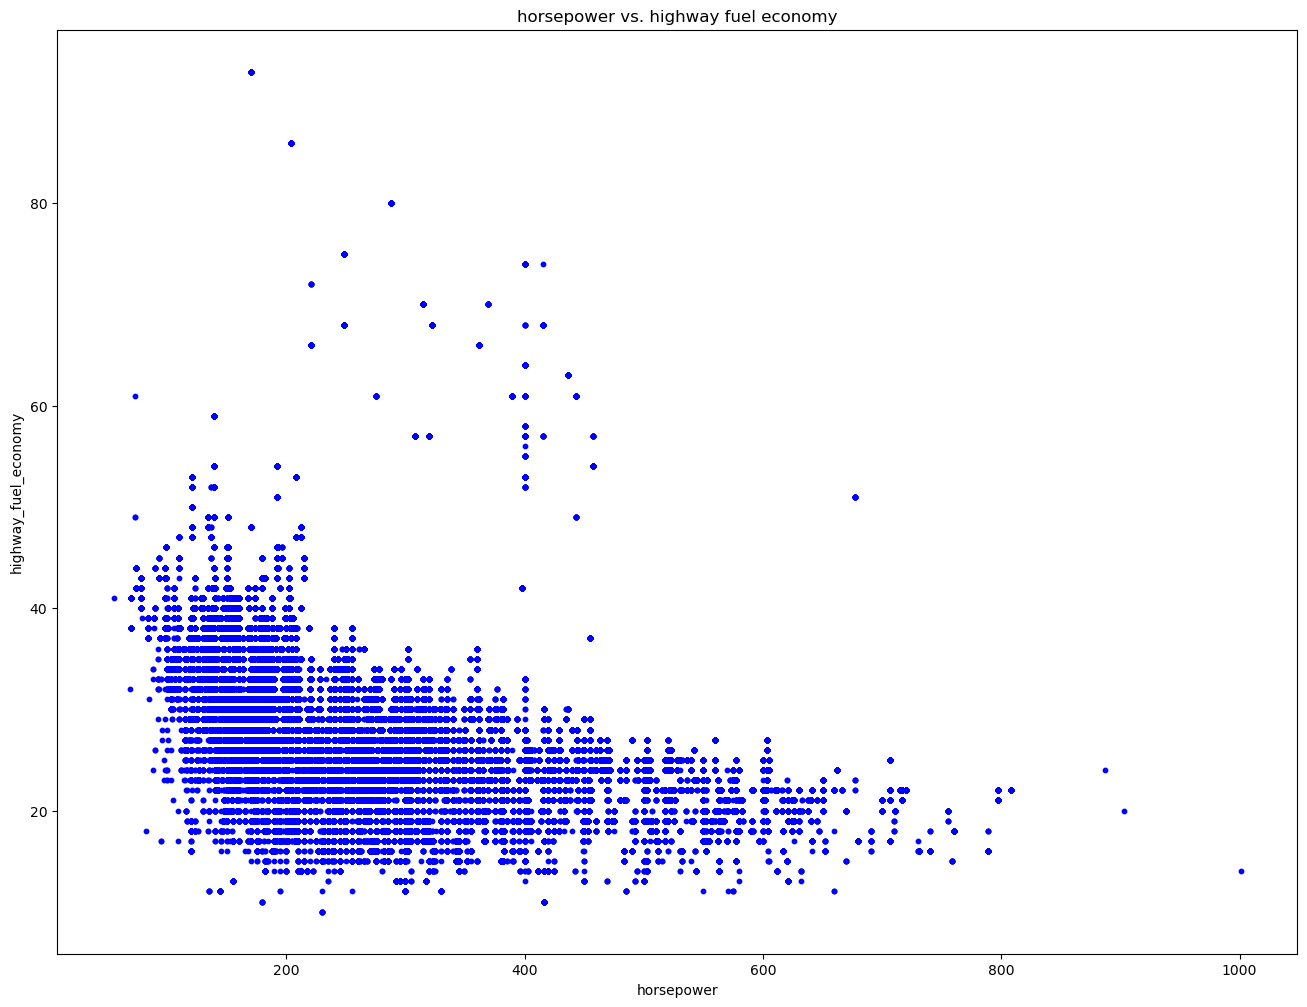

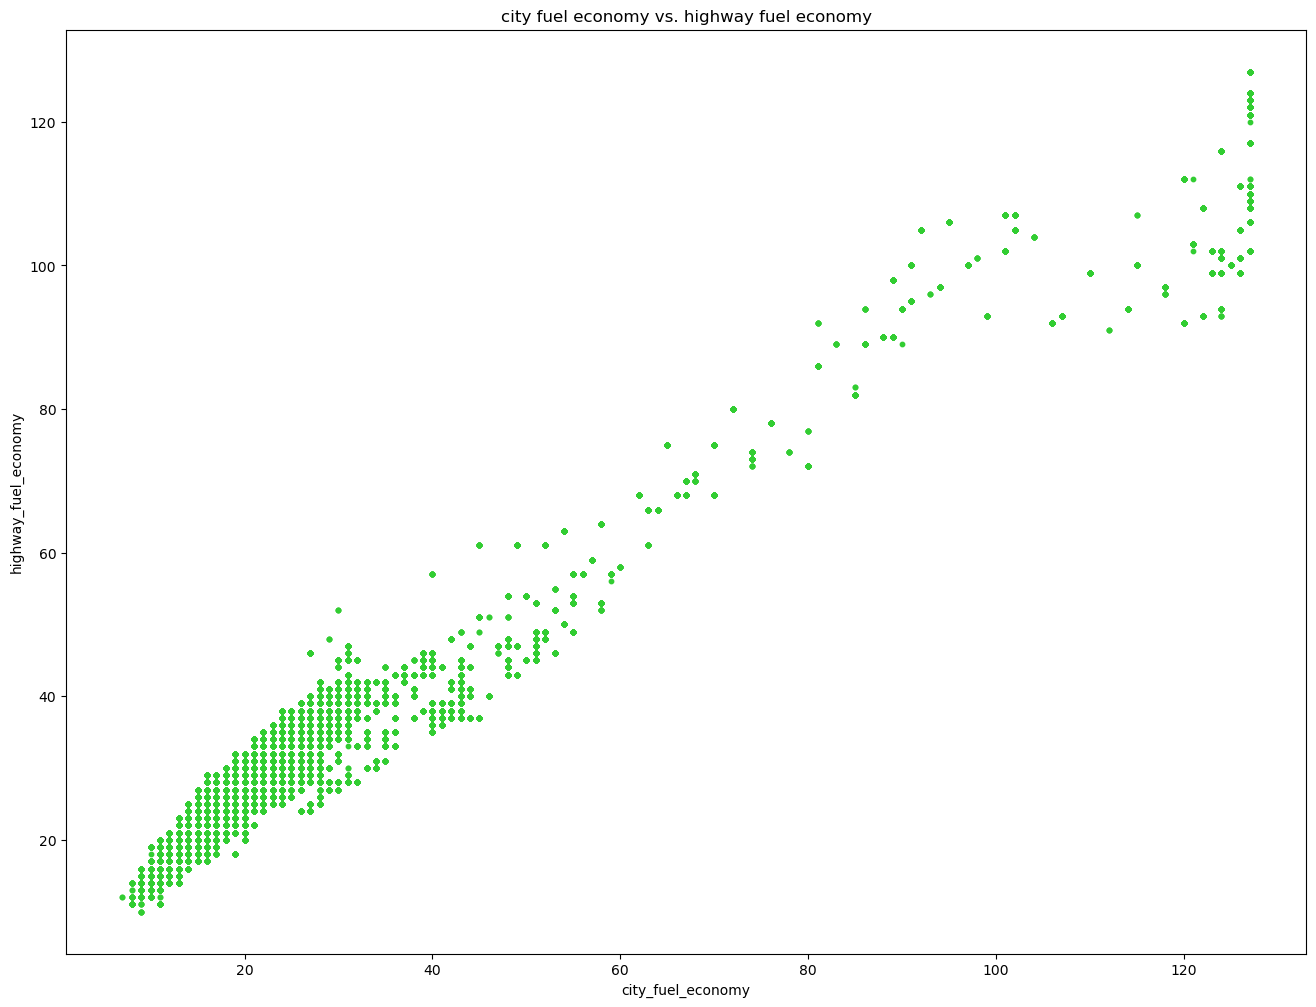

In [22]:
# Let's do a few scatter plots to see if there are correlations between the features

columns = ["daysonmarket", "price", "year", "mileage", "horsepower", "city_fuel_economy", "highway_fuel_economy",
           "seller_rating", "savings_amount"]
df2 = df[columns]

# Fuel economy in city/highway traffic in km per litre -> the higher the better

# Slightly negative correlation
df2.plot(kind = "scatter", x = "horsepower", y = "city_fuel_economy", figsize = (16, 12), color = "red",
                        title = "horsepower vs. city fuel economy", s=10)

# Slightly negative correlation
df2.plot(kind = "scatter", x = "horsepower", y = "highway_fuel_economy", figsize = (16, 12), color = "blue",
                        title = "horsepower vs. highway fuel economy", s=10)

# Strong positive correlation
df2.plot(kind = "scatter", x = "city_fuel_economy", y = "highway_fuel_economy", figsize = (16, 12), color = "limegreen",
                        title = "city fuel economy vs. highway fuel economy", s=10)


# Without preprocessing the data and data cleaning (especially changing datatypes) it is quite difficult to plot any meaningful or 
# illustrative graphs since lot of columns in the original dataframe have the type object and only 18 columns have numerical values.
